In [44]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

Loading Data

In [108]:
# Import the dataset
dataset_df = pd.read_csv('Car_sale_ads.csv')

# Looking at first 5 rows
dataset_df.head(5)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [109]:
# Check data shape
print(f"rows: {dataset_df.shape[0]}, cols: {dataset_df.shape[1]}")


rows: 208304, cols: 25


In [110]:
# Check null values
dataset_df.isnull().sum()

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Vehicle_version             70222
Vehicle_generation          60444
Production_year                 0
Mileage_km                    983
Power_HP                      643
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

These rows has too many nulls and will not be included in the analysis

- Vehicle_version             70222
- Vehicle_generation          60444
- CO2_emissions              114257
- Drive                       15076
- Origin_country              89992
- First_owner                143210
- First_registration_date    121859

These rows has small amount of nulls, and null data with nulls will be trimmed (less than 1% of all)
- Mileage_km                    983
- Power_HP                      643
- Displacement_cm3             1966
- Transmission                  479
- Doors_number                 1487

In [111]:
df = dataset_df.drop(['Vehicle_version', 'Vehicle_generation', 'CO2_emissions', 'Drive', 'Origin_country', 'First_owner', 'First_registration_date'], axis = 1)

# trim columns with nulls less than 1%
columns_to_trim = ['Mileage_km', 'Power_HP', 'Displacement_cm3', 'Transmission', 'Doors_number']
df = df.dropna(subset=columns_to_trim)
print("Null in data: ", df.isnull().sum())


Null in data:  Index                     0
Price                     0
Currency                  0
Condition                 0
Vehicle_brand             0
Vehicle_model             0
Production_year           0
Mileage_km                0
Power_HP                  0
Displacement_cm3          0
Fuel_type                 0
Transmission              0
Type                      0
Doors_number              0
Colour                    0
Offer_publication_date    0
Offer_location            0
Features                  0
dtype: int64


In [112]:
# See the data describe
df.describe().round(2)

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number
count,204060.00,204060.00,204060.00,2.040600e+05,204060.00,204060.00,204060.00
mean,104266.33,61483.29,2012.02,1.514084e+05,151.16,1882.65,4.64
std,60125.13,84073.84,6.96,2.960786e+06,76.52,729.24,0.77
min,0.00,500.00,1915.00,1.000000e+00,1.00,400.00,1.00
25%,52278.75,17500.00,2008.00,5.530000e+04,105.00,1461.00,5.00
50%,104208.50,34900.00,2012.00,1.453230e+05,136.00,1798.00,5.00
75%,156415.25,74900.00,2017.00,2.070000e+05,170.00,1997.00,5.00
max,208303.00,6999000.00,2021.00,1.111111e+09,1300.00,8400.00,55.00


In [113]:
print(df['Colour'].value_counts())

black       49529
gray        31158
silver      30499
white       29441
blue        21187
other       13555
red          9527
brown        5492
green        3554
burgundy     3396
golden       2617
beige        2432
yellow        917
violet        756
Name: Colour, dtype: int64


Currency is not only in PLN, but 246 rows are in EUR. Convert EUR to PLN with exchange rate 1 EUR = 4.46 PLN (10.2023)

In [114]:
print(df['Currency'].value_counts())

PLN    203814
EUR       246
Name: Currency, dtype: int64


In [115]:
# find rows in EUR and convert the price to PLN by multiplying by the 4.46
df.loc[df['Currency'] == 'EUR', 'Price'] *= 4.46

## Outliers

- Some prices or power engines are high, but there are unique cars like Bentley, Lamborghini, Rolls-Royce etc. Some of the vehicles are new and have a mileage of less than 10 km. So let's remove outliers from Price and power_HP

- let's remove vehicles manufactured before 1995, because many of them are classics and their price may vary, depending on the condition.

In [137]:
# detect outliers using IQR formula, but no 25/75
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 5)
    Q3 = np.percentile(data, 95)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    outliers = (data < lower_limit) | (data > upper_limit)
    return outliers

# Find outliers in Price and Power_HP
outliers_price = detect_outliers_iqr(df['Price'])
outliers_power_hp = detect_outliers_iqr(df['Power_HP'])

# remove outliers
df_filtered = df[~(outliers_price | outliers_power_hp)]

# Remove cars manufactured under 1995
df_filtered = df_filtered[df_filtered['Production_year'] >= 1995]
print(f"rows: {df_filtered.shape[0]}, cols: {df_filtered.shape[1]}")



rows: 200162, cols: 18


## Top selling brands

1.	Volkswagen	18018
2.	BMW	16491
3.	Audi	16303
4.	Opel	16123
5.	Ford	15864
6.	Mercedes-Benz	11827
7.	Renault	10506
8.	Toyota	10150
9.	Škoda	10034
10.	Peugeot	8860

In [138]:
df_filtered['Vehicle_brand'].unique()

array(['Abarth', 'Acura', 'Aixam', 'Alfa Romeo', 'Alpine', 'Aston Martin',
       'Audi', 'Austin', 'Baic', 'Bentley', 'BMW', 'Buick', 'Cadillac',
       'Casalini', 'Chatenet', 'Chevrolet', 'Chrysler', 'Citroën',
       'Cupra', 'Dacia', 'Daewoo', 'Daihatsu', 'DFSK', 'Dodge',
       'DS Automobiles', 'FAW', 'Ferrari', 'Fiat', 'Ford', 'GMC',
       'Grecav', 'Honda', 'Hummer', 'Hyundai', 'Infiniti', 'Isuzu',
       'Iveco', 'Jaguar', 'Jeep', 'Kia', 'Lada', 'Lamborghini', 'Lancia',
       'Land Rover', 'Lexus', 'Ligier', 'Lincoln', 'Lotus', 'Maserati',
       'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'MG', 'Microcar',
       'MINI', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Opel', 'Inny',
       'Tata', 'Uaz', 'Żuk', 'Suzuki', 'Subaru', 'Volkswagen', 'Zastava',
       'SsangYong', 'Peugeot', 'RAM', 'Renault', 'Zaporożec', 'Plymouth',
       'Polonez', 'Pontiac', 'Porsche', 'Rolls-Royce', 'Rover', 'Saab',
       'Santana', 'Saturn', 'Scion', 'Seat', 'Škoda', 'Smart', 'Tarpan',
       

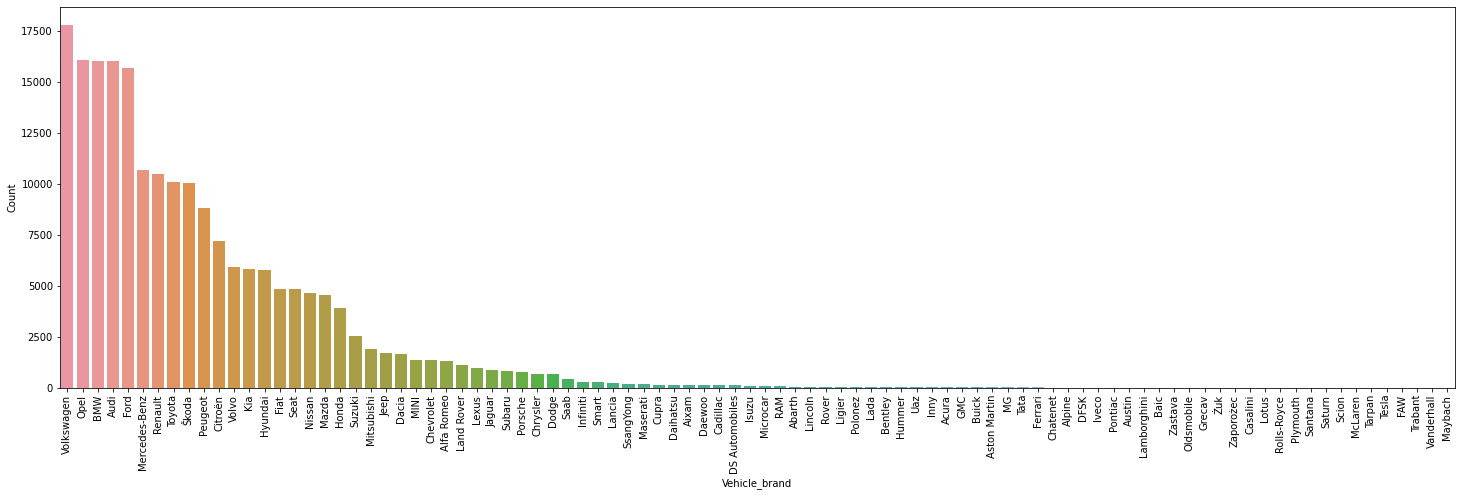

In [139]:
# Sort df based on counts 'Vehicle_brand'
top_brand_df = df_filtered['Vehicle_brand'].value_counts().reset_index()
top_brand_df.columns = ['Vehicle_brand', 'Count']
top_brand = top_brand_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(25, 7))
sns.barplot(data=top_brand_df, x='Vehicle_brand', y='Count')
plt.xticks(rotation=90)
plt.show()

In [140]:
# Top 10 brands with sales number
top_brand_df.head(10)

,Vehicle_brand,Count
0,Volkswagen,17796
1,Opel,16068
2,BMW,16028
3,Audi,16025
4,Ford,15719
5,Mercedes-Benz,10687
6,Renault,10479
7,Toyota,10084
8,Škoda,10025
9,Peugeot,8845


## Fuel type 
- Gasoline: 47.35%
- Diesel: 45.35%
- Gasoline + LPG: 4.42%
- Hybrid: 2.85%
- Gasoline + CNG: 0.03%

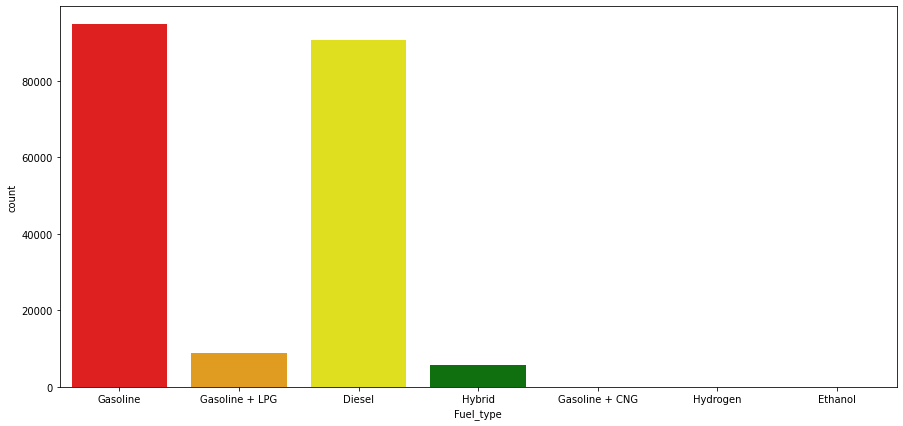

Gasoline: 47.35%
Diesel: 45.35%
Gasoline + LPG: 4.42%
Hybrid: 2.85%
Gasoline + CNG: 0.03%
Hydrogen: 0.00%
Ethanol: 0.00%


In [141]:
colors = {
    'Gasoline': 'red',
    'Diesel': 'yellow',
    'Gasoline + LPG': 'orange',
    'Hybrid': 'green',
    'Gasoline + CNG': 'blue',
    'Hydrogen': 'purple',
    'Ethanol': 'pink',
}
plt.figure(figsize=(15,7))
sns.countplot(data=df_filtered, x='Fuel_type', palette=colors)
plt.show()


# Visualize in % fuel type
total_cars = len(df_filtered)
fuel_type_counts = df_filtered['Fuel_type'].value_counts()
percentages = (fuel_type_counts / total_cars) * 100

for fuel_type, percentage in percentages.items():
    print(f"{fuel_type}: {percentage:.2f}%")


## price vs fuel type

In [142]:
df_filtered['Fuel_type'].value_counts()


Gasoline          94772
Diesel            90775
Gasoline + LPG     8841
Hybrid             5700
Gasoline + CNG       70
Hydrogen              2
Ethanol               2
Name: Fuel_type, dtype: int64

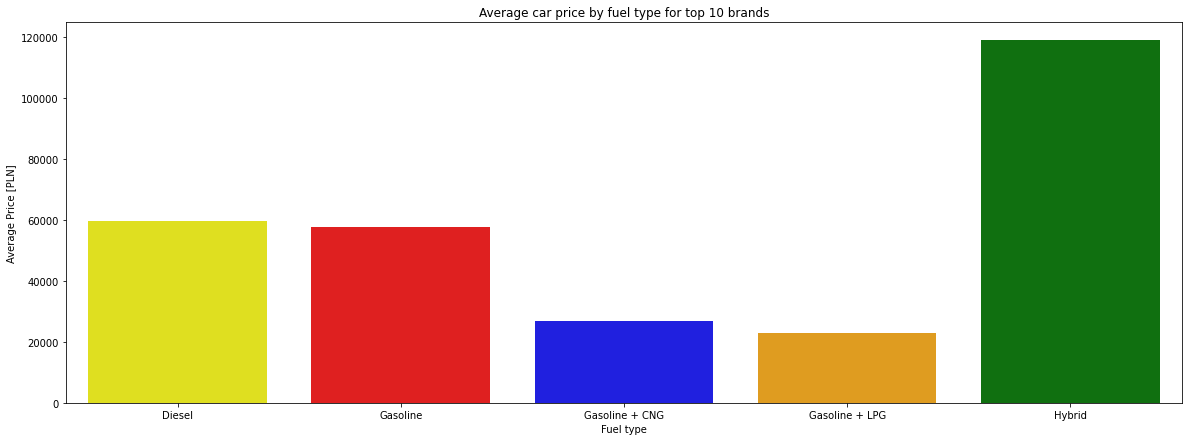

In [143]:
top_10_brands = df_filtered['Vehicle_brand'].value_counts().head(10).index
df_top_10 = df_filtered[df_filtered['Vehicle_brand'].isin(top_10_brands)]

average_prices_by_fuel_type = df_top_10.groupby('Fuel_type')['Price'].mean().reset_index()

colors = {
    'Gasoline': 'red',
    'Diesel': 'yellow',
    'Gasoline + LPG': 'orange',
    'Hybrid': 'green',
    'Gasoline + CNG': 'blue',
    'Hydrogen': 'purple',
    'Ethanol': 'pink',
}

plt.figure(figsize=(20, 7))
sns.barplot(x='Fuel_type', y='Price', data=average_prices_by_fuel_type, palette=colors)
plt.xlabel('Fuel type')
plt.ylabel('Average Price [PLN]')
plt.title('Average car price by fuel type for top 10 brands')
plt.show()

Price for Diesel or Gasoline are equal. For hybrid you should pay the most. You will pay much less for cars with LPG or CNG

## Check most frequently purchased car year
- people mostly bought the newest cars

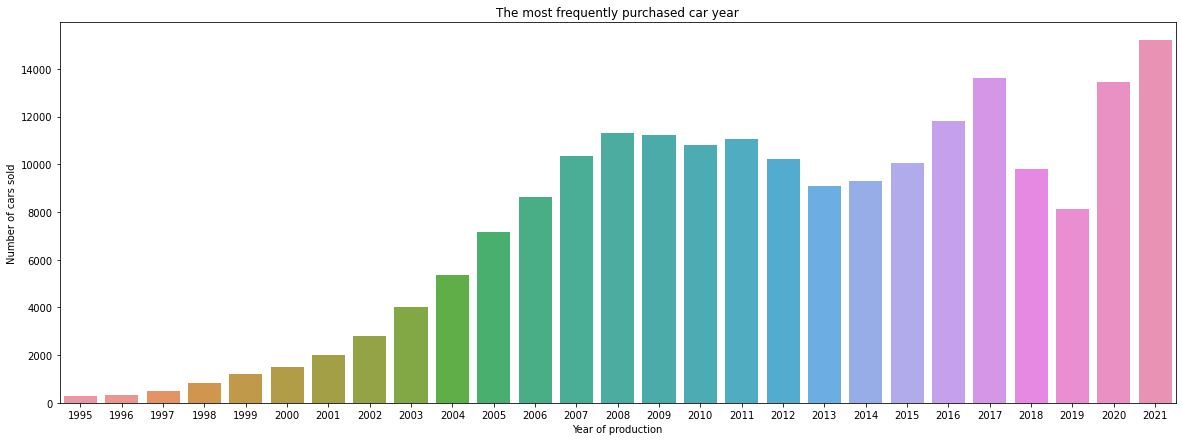

In [144]:
top_years = df_filtered['Production_year'].value_counts().head(30).index

plt.figure(figsize=(20, 7))
sns.barplot(x=top_years, y=df_filtered['Production_year'].value_counts().head(30))
plt.xlabel('Year of production')
plt.ylabel('Number of cars sold')
plt.title('The most frequently purchased car year')
plt.show()

## top 10 brand vs price

In [145]:
top_10_brands = df_filtered['Vehicle_brand'].value_counts().head(10).index
df_top_10 = df_filtered[df_filtered['Vehicle_brand'].isin(top_10_brands)]

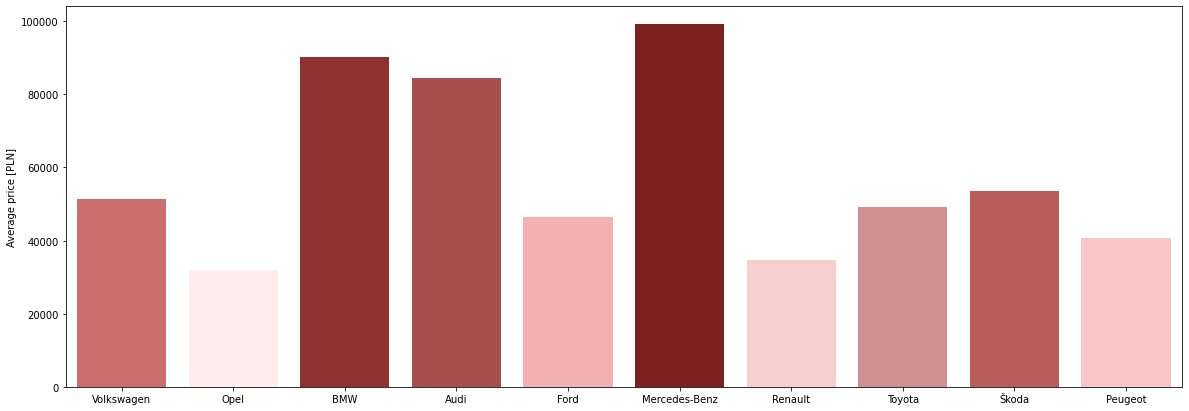

In [147]:
#group by top 10 brand and price and calculate avg price

average_prices_by_brand = df_filtered[df_filtered['Vehicle_brand'].isin(top_10_brands)].groupby('Vehicle_brand')['Price'].mean()

colors = {
    'Mercedes-Benz': '#8c1010',
    'BMW': '#a02121',
    'Audi': '#b44141',
    'Škoda': '#c84d4d',
    'Volkswagen': '#dc5e5e',
    'Toyota': '#dc8585',
    'Ford': '#ffa6a6',
    'Peugeot': '#ffbfbf',
    'Renault': '#ffc8c8',
    'Opel': '#ffe9e9'
}
#sort results by selling
average_prices_by_brand = average_prices_by_brand.reindex(top_10_brands)


plt.figure(figsize=(20, 7))
sns.barplot(x=average_prices_by_brand.index, y=average_prices_by_brand, palette=colors)
plt.ylabel('Average price [PLN]')
plt.show()

- Mercedes-Benz, BMW and Audi are the most expensive
- mid-range cars are Volkswagen, Ford, Toyota and Škoda 
- Cheaper cars (compared to other brands) are Opel, Renault, Peugot

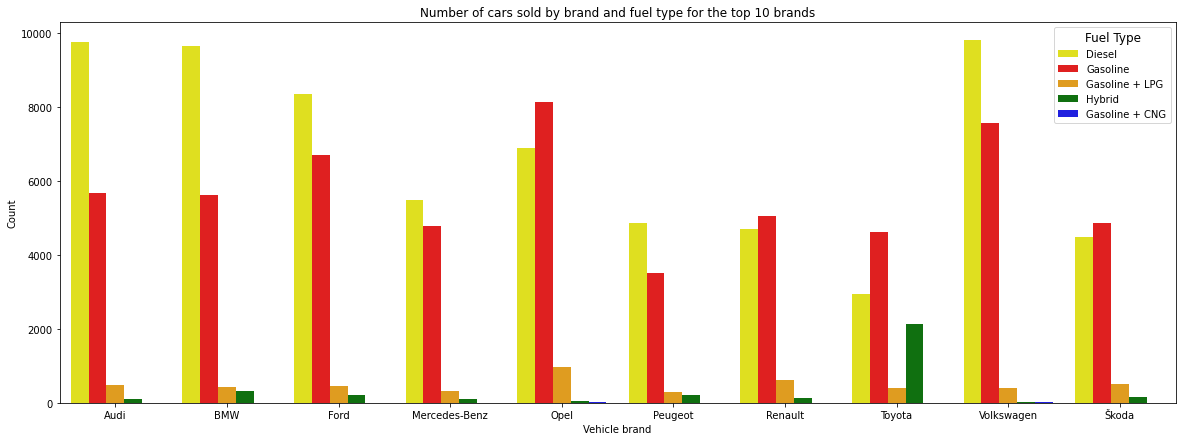

In [148]:
sales_by_brand_fuel_type = df_top_10.groupby(['Vehicle_brand', 'Fuel_type']).size().reset_index(name='Count')
colors = {
    'Gasoline': 'red',
    'Diesel': 'yellow',
    'Gasoline + LPG': 'orange',
    'Hybrid': 'green',
    'Gasoline + CNG': 'blue',
    'Hydrogen': 'purple',
    'Ethanol': 'pink',
}

plt.figure(figsize=(20, 7))
sns.barplot(x='Vehicle_brand', y='Count', hue='Fuel_type', data=sales_by_brand_fuel_type, palette=colors)
plt.xlabel('Vehicle brand')
plt.ylabel('Count')
plt.title('Number of cars sold by brand and fuel type for the top 10 brands')
plt.legend(title='Fuel Type', title_fontsize='12')
plt.show()


- most brands sell more diesel than gasoline (Audi, BMW, Ford, Mercedes-Benz, Peugeot, Volkswagen) 
- In the case of Opel, Renault, Toyota and Skoda, more gasoline is sold. 
- Worth noting that Toyota sells much more hybrid cars than other brands

## Check correlations
Price are correlated with production year, Power_HP and displacement_cm3 which is correlated with horse power

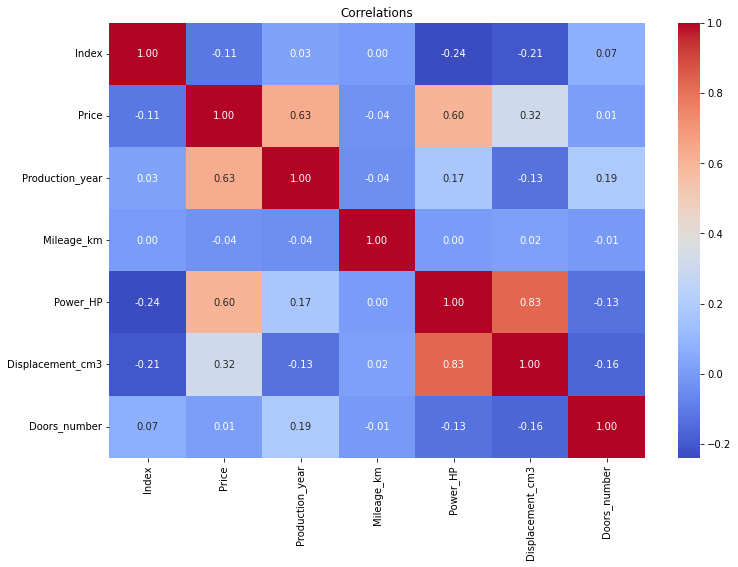

In [152]:
correlation_matrix = df_filtered.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlations")
plt.show()


## Horse power vs displacement_cm3 

- the greater the engine power, the greater the engine displacement
- for Mercedes-Benz, Audi and BMW, the average engine power is 200 HP and engine displacement above 2200 cm^3
- for Ford, the average engine power is 141 KM, and engine displacement  ~1800 cm^3
- for Opel, Peugeot, Renault, Toyota, Volkswagen and Škoda, the average engine power is ~120 HP and engine displacement around 1500-1800 cm^3

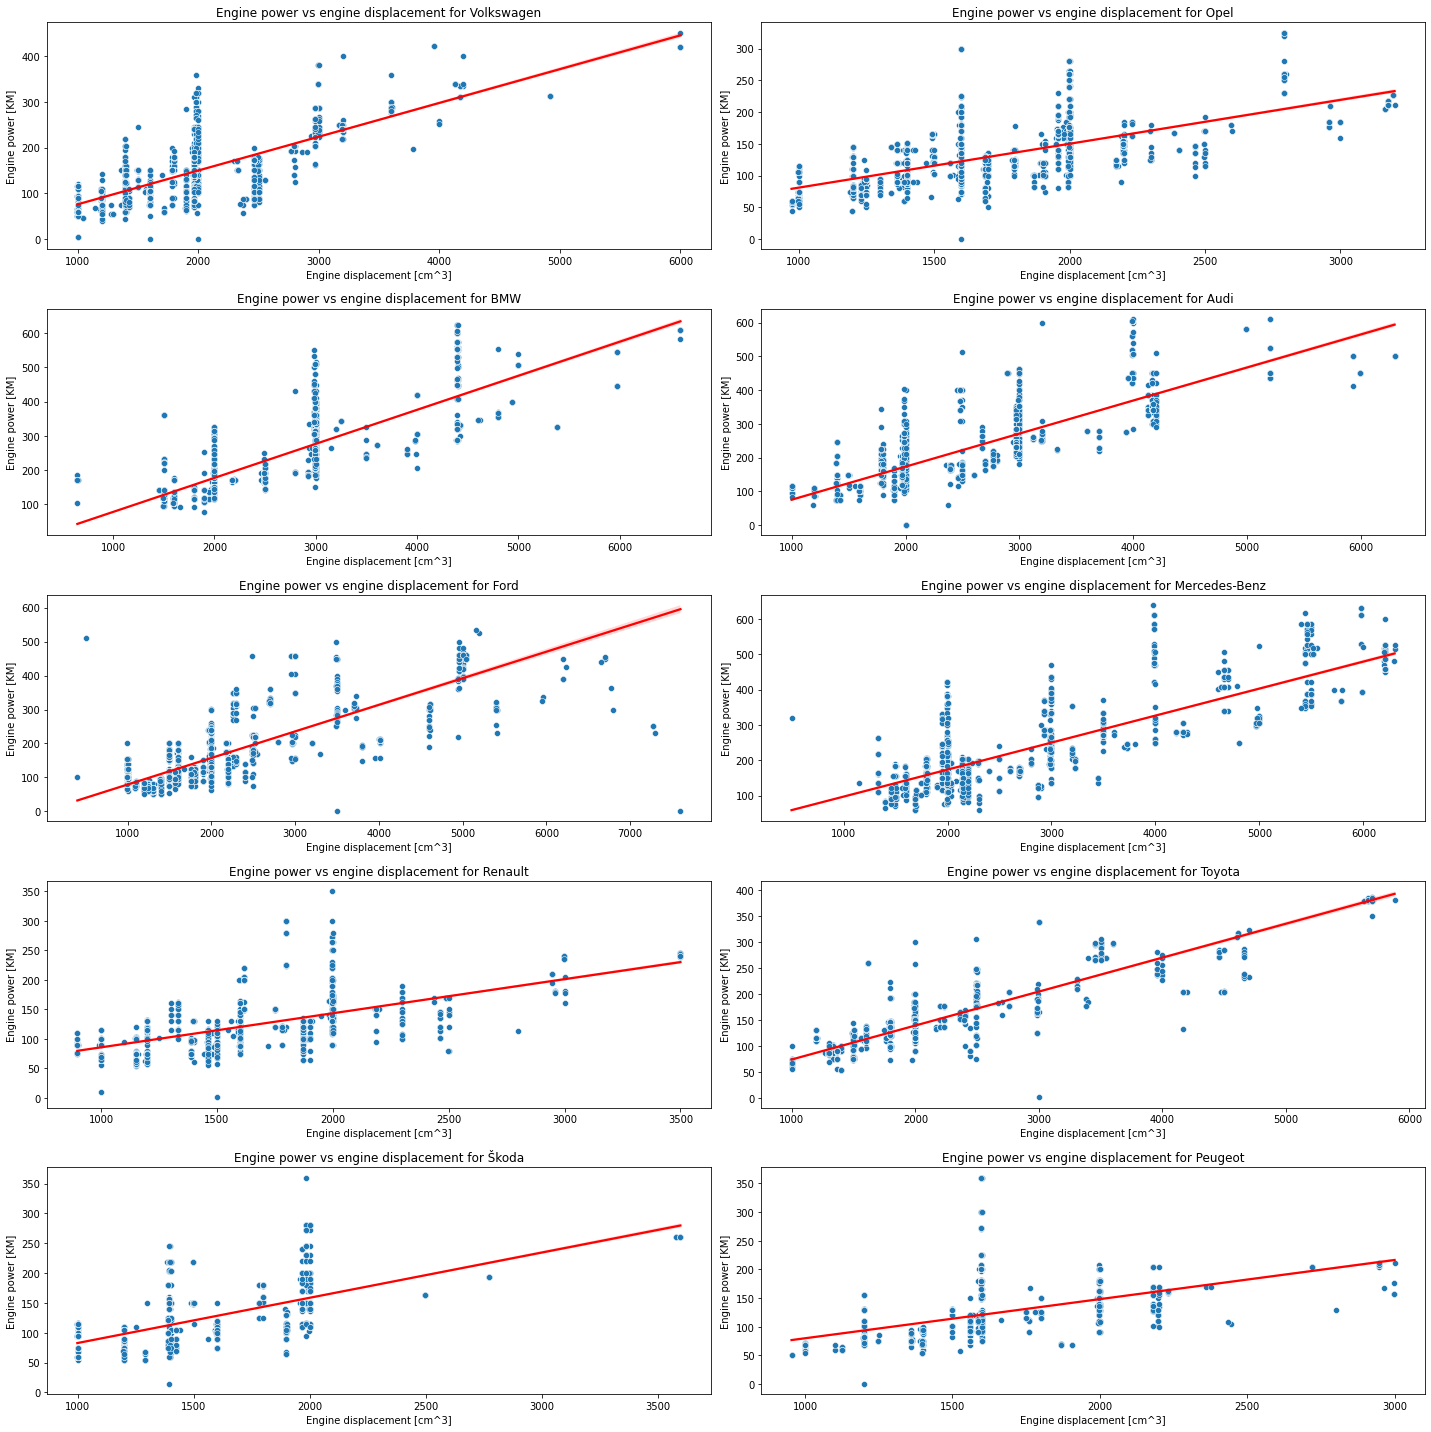

               Power_HP  Displacement_cm3
Vehicle_brand                            
Audi              195.0            2218.0
BMW               209.0            2326.0
Ford              141.0            1795.0
Mercedes-Benz     210.0            2478.0
Opel              123.0            1603.0
Peugeot           120.0            1593.0
Renault           116.0            1519.0
Toyota            123.0            1745.0
Volkswagen        131.0            1744.0
Škoda             125.0            1553.0


In [153]:
plt.figure(figsize=(20, 20))

for i, brand in enumerate(top_10_brands):
    plt.subplot(5, 2, i + 1)
    brand_data = df_filtered[df_filtered['Vehicle_brand'] == brand]
    sns.scatterplot(x='Displacement_cm3', y='Power_HP', data=brand_data)

    sns.regplot(x='Displacement_cm3', y='Power_HP', data=brand_data, scatter=False, color='red')
    plt.xlabel('Engine displacement [cm^3]')
    plt.ylabel('Engine power [KM]')
    plt.title(f'Engine power vs engine displacement for {brand}')

plt.tight_layout()
plt.show()

#calcualte average HP and cm3 for every brand
average_power_displacement = df_top_10.groupby('Vehicle_brand')[['Power_HP', 'Displacement_cm3']].mean()

# Wyświetl wyniki
print(round(average_power_displacement))


## Price vs Year of production


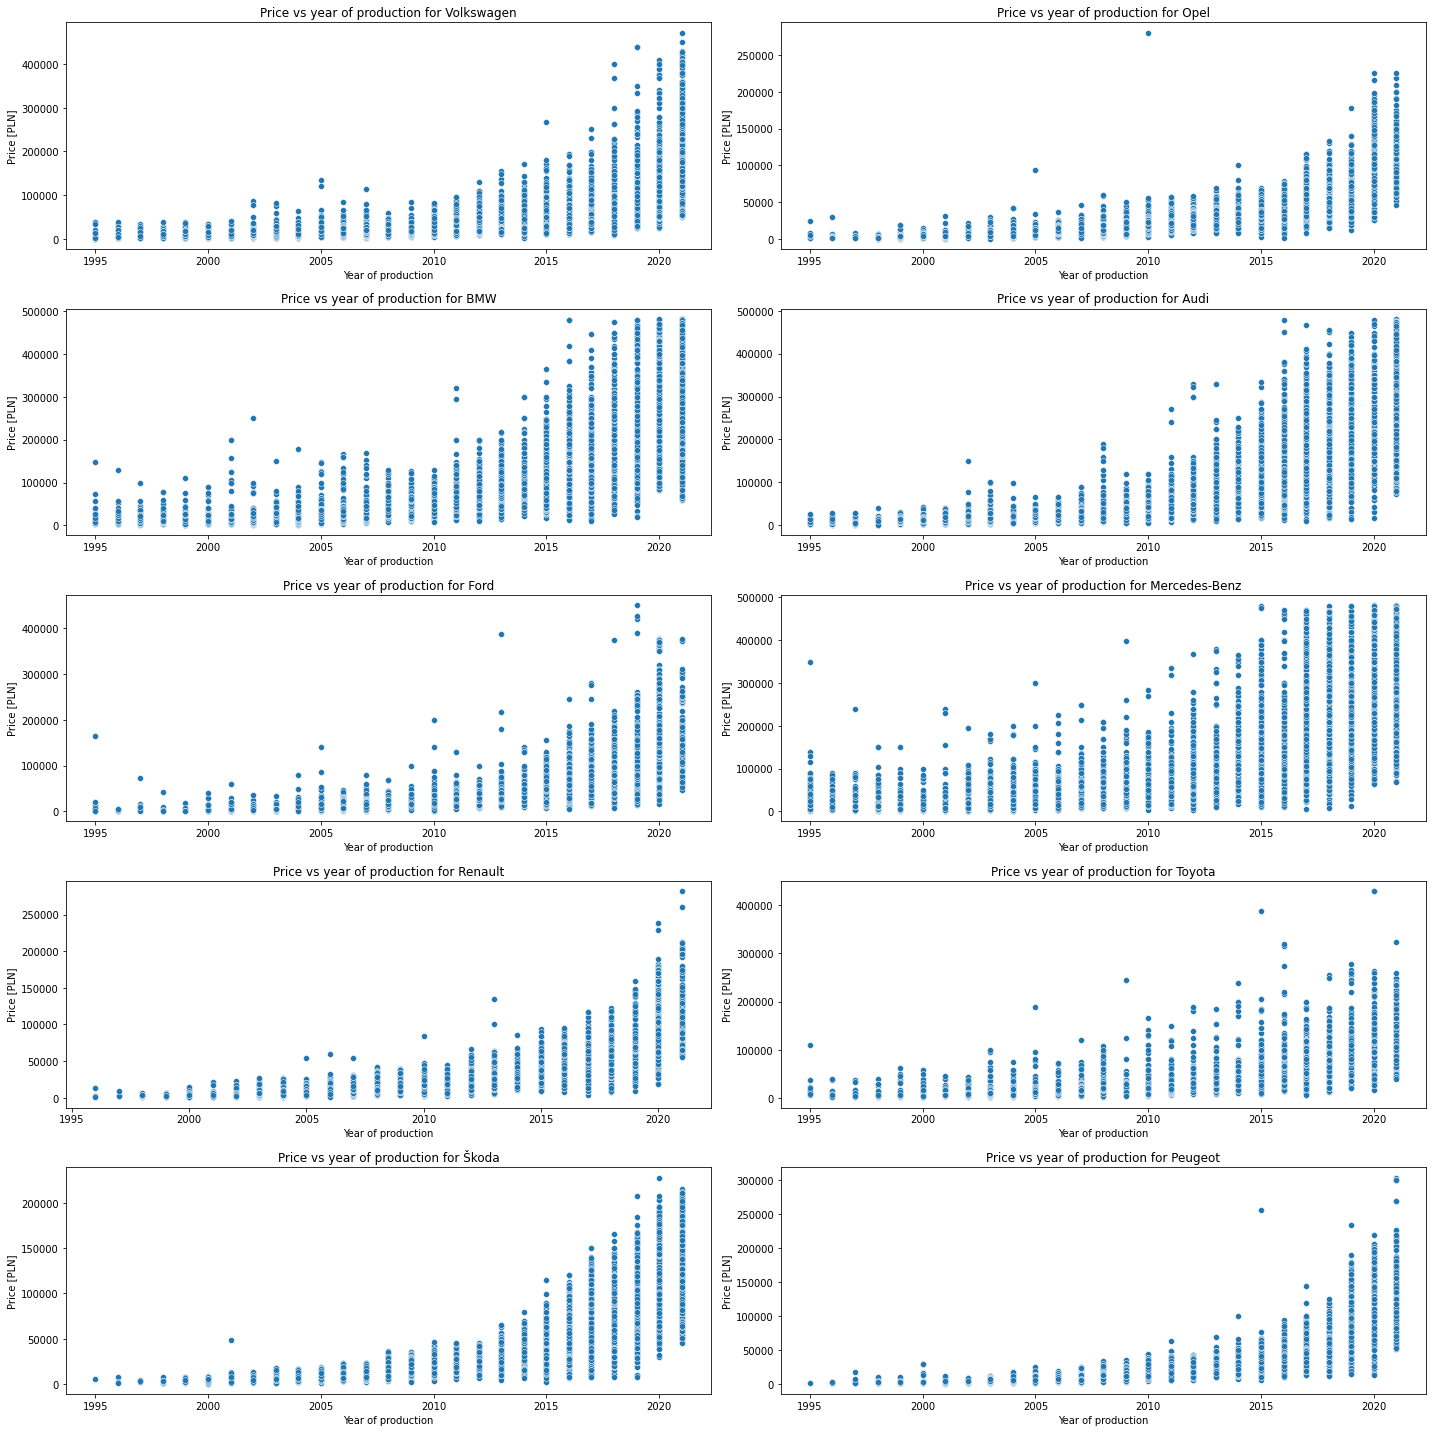

In [154]:
plt.figure(figsize=(20, 20))

for i, brand in enumerate(top_10_brands):
    plt.subplot(5, 2, i + 1)
    brand_data = df_filtered[df_filtered['Vehicle_brand'] == brand]
    sns.scatterplot(x='Production_year', y='Price', data=brand_data)
    plt.xlabel('Year of production')
    plt.ylabel('Price [PLN]')
    plt.title(f'Price vs year of production for {brand}')

plt.tight_layout()
plt.show()


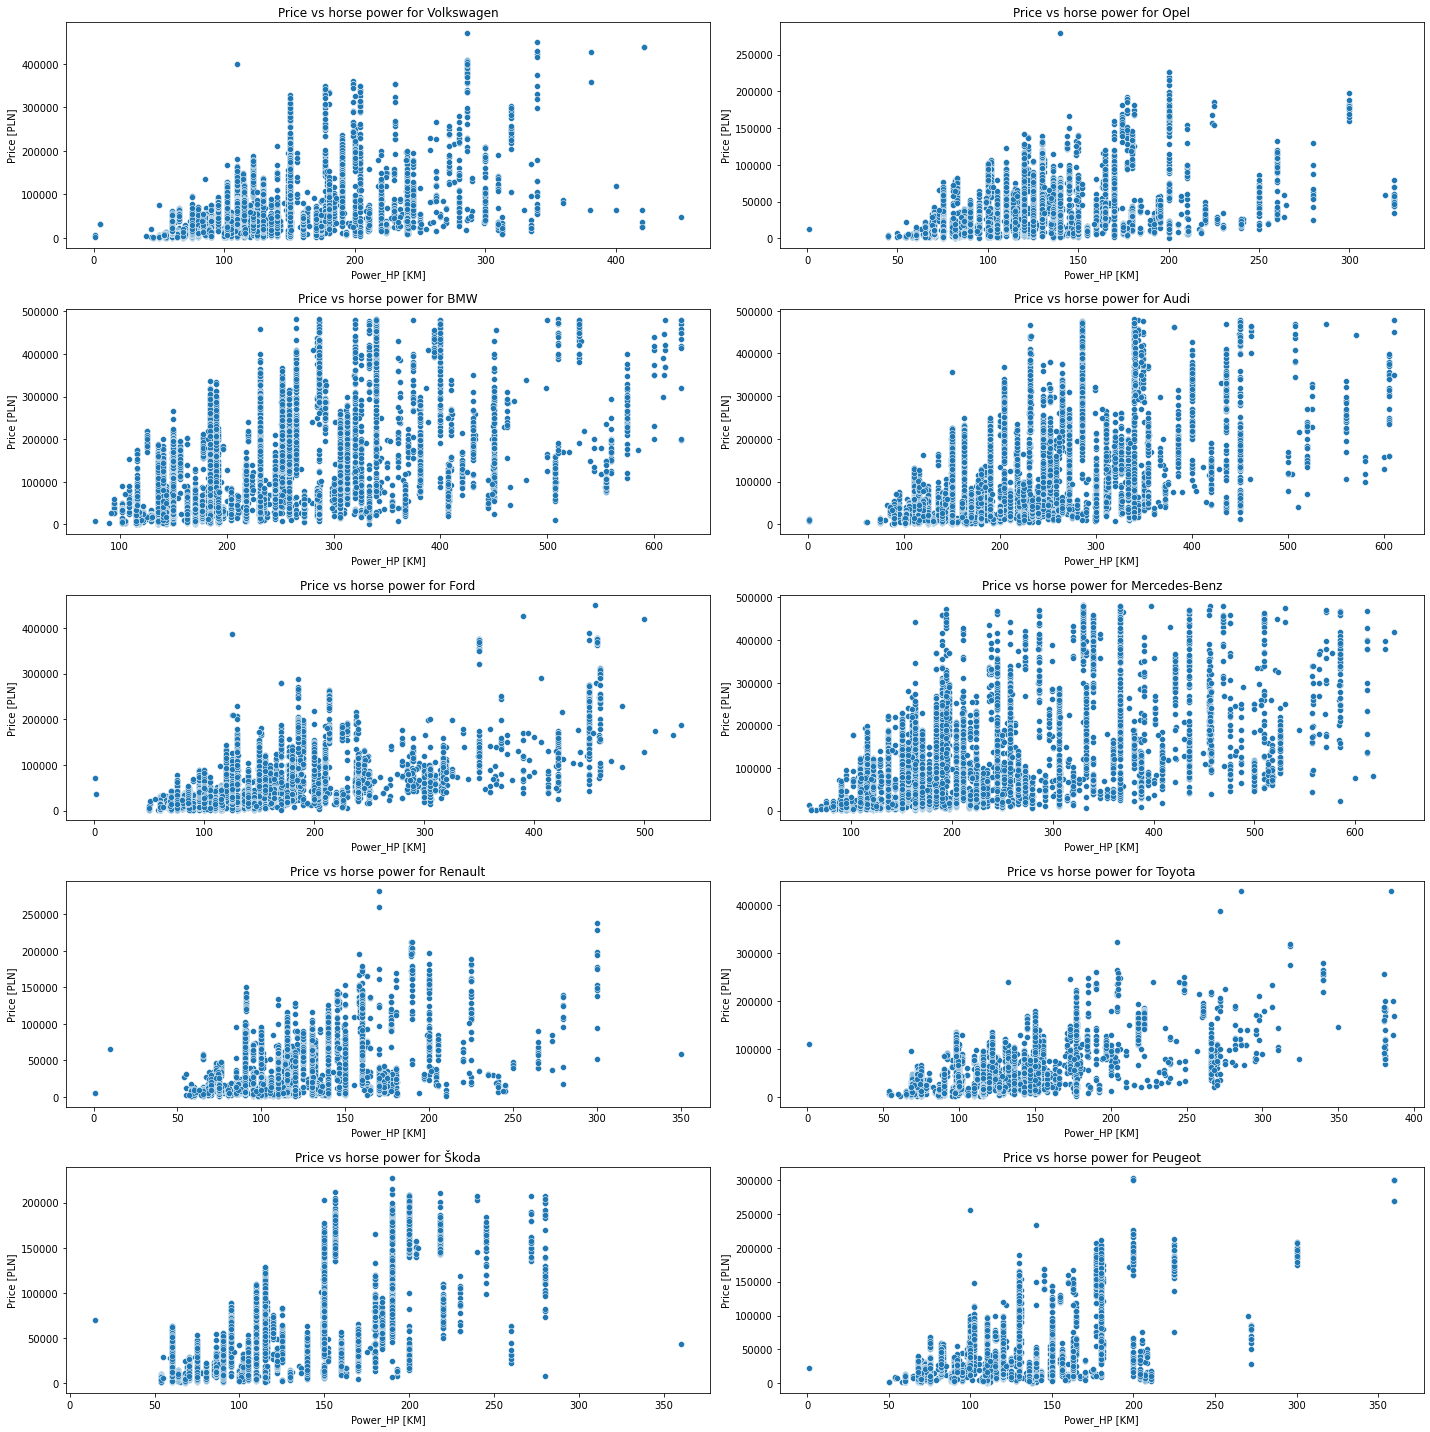

In [155]:
plt.figure(figsize=(20, 20))

for i, brand in enumerate(top_10_brands):
    plt.subplot(5, 2, i + 1)
    brand_data = df_filtered[df_filtered['Vehicle_brand'] == brand]
    sns.scatterplot(x='Power_HP', y='Price', data=brand_data)
    plt.xlabel('Power_HP [KM]')
    plt.ylabel('Price [PLN]')
    plt.title(f'Price vs horse power for {brand}')

plt.tight_layout()
plt.show()

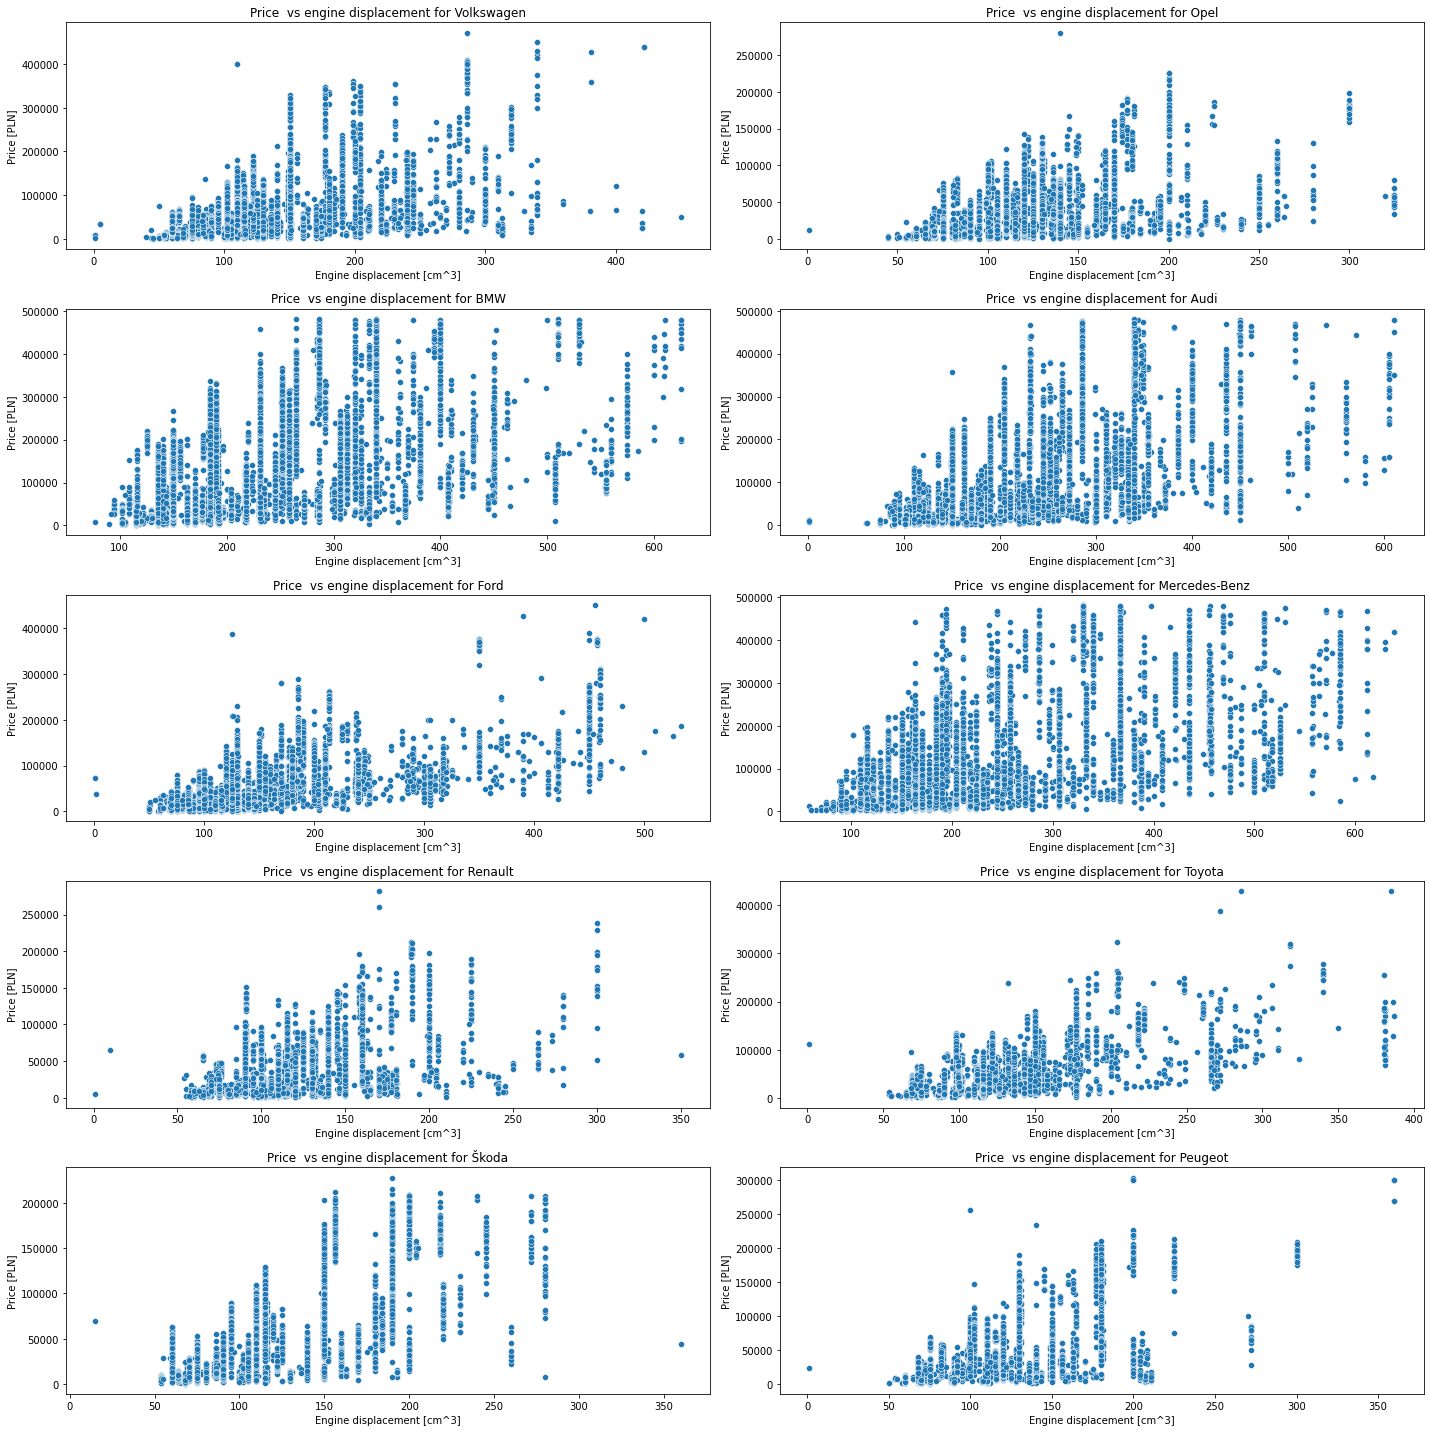

In [156]:
plt.figure(figsize=(20, 20))

for i, brand in enumerate(top_10_brands):
    plt.subplot(5, 2, i + 1)
    brand_data = df_filtered[df_filtered['Vehicle_brand'] == brand]
    sns.scatterplot(x='Power_HP', y='Price', data=brand_data)
    plt.xlabel('Engine displacement [cm^3]')
    plt.ylabel('Price [PLN]')
    plt.title(f'Price  vs engine displacement for {brand}')

plt.tight_layout()
plt.show()
